# Table of Contents

1. [Import Packages](#import-packages) 
2. [Import Mouse Metadata](#import-mouse-metadata)
3. [Import all sessions combined pose-estimation CSV](#import-all-sessions-combined-pose-estimation-csv)
4. [Simulated Agent Modelling](#simulated-agent-modelling)
<br>&nbsp;&nbsp;&nbsp;&nbsp; 4.1. [Plot 1: Simulated Agent v/s Mouse Performance across Time](#plot-1-simulated-agent-vs-mouse-performance-across-time)
<br>&nbsp;&nbsp;&nbsp;&nbsp; 4.2. [Plot 2: Relative Performance across Time](#plot-2-relative-performance-across-time)
<br>&nbsp;&nbsp;&nbsp;&nbsp; 4.3. [Plot 3: Avg. Simulated Agent and Mouse Performance across Sessions(/Mice)](#plot-3-avg-simulated-agent-and-mouse-performance-across-sessionsmice)
5. [Chi Square Analysis](#chi-square-analysis)
<br>&nbsp;&nbsp;&nbsp;&nbsp; 5.1. [Plot 4: Chi Square Statistic of Agents across Time](#plot-4-chi-square-statistic-of-agents-across-time)
6. [Simulated Agent, Binary Agent, 3/4-way Agent Modelling & Comparison](#simulated-agent-binary-agent-34-way-agent-modelling--comparison)
<br>&nbsp;&nbsp;&nbsp;&nbsp; 6.1. [Plot 5: All Agents Comparative Performance over time](#plot-5-all-agents-comparative-performance-over-time)
<br>&nbsp;&nbsp;&nbsp;&nbsp; 6.2. [Plot 6: Cumulative Agent Performance](#plot-6-cumulative-agent-performance)
7. [Exploration-Exploitation (EE) Agent Evaluation](#exploration-exploitation-ee-agent-evaluation)
<br>&nbsp;&nbsp;&nbsp;&nbsp; 7.1. [Plot 7: Agent Performance Across Varying Exploration Rates](#plot-7-agent-performance-across-varying-exploration-rates)




# Import Packages

In [11]:
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd

In [ ]:
# autoreload (mainly for testing purposes)
%load_ext autoreload
%autoreload 2

In [13]:
CUSTOM_UTILS_PATH = Path(os.getcwd()).parent/'src'/'behavior'/'behavior_metrics'/'simulation_modeling'
if CUSTOM_UTILS_PATH.exists():
    sys.path.append(str(CUSTOM_UTILS_PATH))
    # Import custom analysis modules
    try:
        import explore_exploit_agent
        from explore_exploit_agent import *
        import multi_agent
        from multi_agent import *
        import simulated_agent
        from simulated_agent import *
        print("Utils loaded successfully!")
    except ImportError as e:
        print(f"Warning: Could not import custom modules: {e}")
else:
    print(f"Warning: Custom utils path not found: {CUSTOM_UTILS_PATH}")


import init_config
from init_config import *

import notebook_utils
from notebook_utils import *

Utils loaded successfully!


In [14]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['pdf.fonttype'] = 42

# Import Mouse Metadata

In [6]:
# Read in mouse metadata file
mouseinfo = pd.read_excel(os.path.join(METADATA_PATH,METADATA_FILE), sheet_name=TRIAL_TYPE)
print('Metadata columns: ',mouseinfo.columns)

# Consider only non-NA Sessions
mouseinfo = mouseinfo[~mouseinfo['Session #'].isna()]

# Find the subset of trials need to be excluded
mouseinfo = mouseinfo.loc[mouseinfo['Exclude Trial']!= 'yes'].reset_index(drop=True)

Metadata columns:  Index(['Session #', 'Run Date', 'Time Of Day', 'Rack Location', 'Computer',
       'Noldus Chamber', 'Camera #', 'Noldus Trial', 'Noldus Project Name',
       'DSI Trial', 'ID', 'Name', 'Sex', 'Status', 'Line', 'Genotype',
       'GenotypeOG', 'Birth Date', 'Age (months)', 'Housing ID',
       'Transmitter #', 'Exclude Trial', 'X1', 'X2', 'Y1', 'Y2', 'NOTES'],
      dtype='object')


# Import all sessions combined pose-estimation CSV

In [7]:
df_all_csv = pd.read_csv(os.path.join(BASE_PATH,'csvs','combined','Preprocessed_combined_file_exclusions.csv'))

# Simulated Agent Modelling

In [15]:
# =================== USAGE EXAMPLE =================== #
# This function evaluates the performance of a simulated agent navigating the maze
# by estimating the proportion of optimal decisions (e.g., choosing the reward path)
# within fixed-size epochs across multiple simulations and bootstrap samples.

# Recommended Use:
# ---------------
# 1. Ensure `df_all_csv` includes 'Session', 'Grid Number', and the specified decision node labels.
# 2. Set `epoch_size` to define the number of frames grouped into each epoch (e.g., 1000).
# 3. Set `n_bootstrap` to the number of bootstrap resamples per simulation.
# 4. Set `n_simulations` to the number of independent simulated agents to evaluate.
# 5. Set `decision_label` to the node type representing decision points (e.g., 'Decision (Reward)').
# 6. Set `reward_label` to the region considered as the optimal path (e.g., 'Reward Path').

# Example Workflow:
# -----------------

#--------------- SET THESE VALUES --------------#
EPOCH_SIZE = 1000
N_BOOTSTRAP = 10000
N_SIMULATIONS = 100
DECISION_LABEL = 'Decision (Reward)'
REWARD_LABEL = 'Reward Path'
GENOTYPE = 'WT-WT'

#________________________________________________________
df_sim = evaluate_agent_performance(
    df=df_all_csv.loc[df_all_csv.Genotype==GENOTYPE],
    epoch_size=EPOCH_SIZE,
    n_bootstrap=N_BOOTSTRAP,
    n_simulations=N_SIMULATIONS,
    decision_label=DECISION_LABEL,
    reward_label=REWARD_LABEL
)


In [16]:
# =================== USAGE EXAMPLE =================== #
# This function trims the simulated agent performance dataframe to the set of
# common epochs shared across all simulations, ensuring clean aggregation and plotting.

# Recommended Use:
# ---------------
# 1. Ensure `df_sim` is the output from `evaluate_agent_performance()`.
# 2. Use this step before plotting or statistical comparison to remove incomplete epochs.

# Example Workflow:
# -----------------

#________________________________________________________
df_sim_trimmed = trim_to_common_epochs(df_sim)


 Max common epoch across all sessions: 26


## Plot 1: Simulated Agent v/s Mouse Performance across Time

Saved: c:\Users\PalopLabPortal\Gladstone Dropbox\Shreya Bangera\Labyrinth Mazes discussions\Code\TEST_COMPASS\results/simulation_agent\WT-WT_SimAgent_Mouse_Perf.pdf


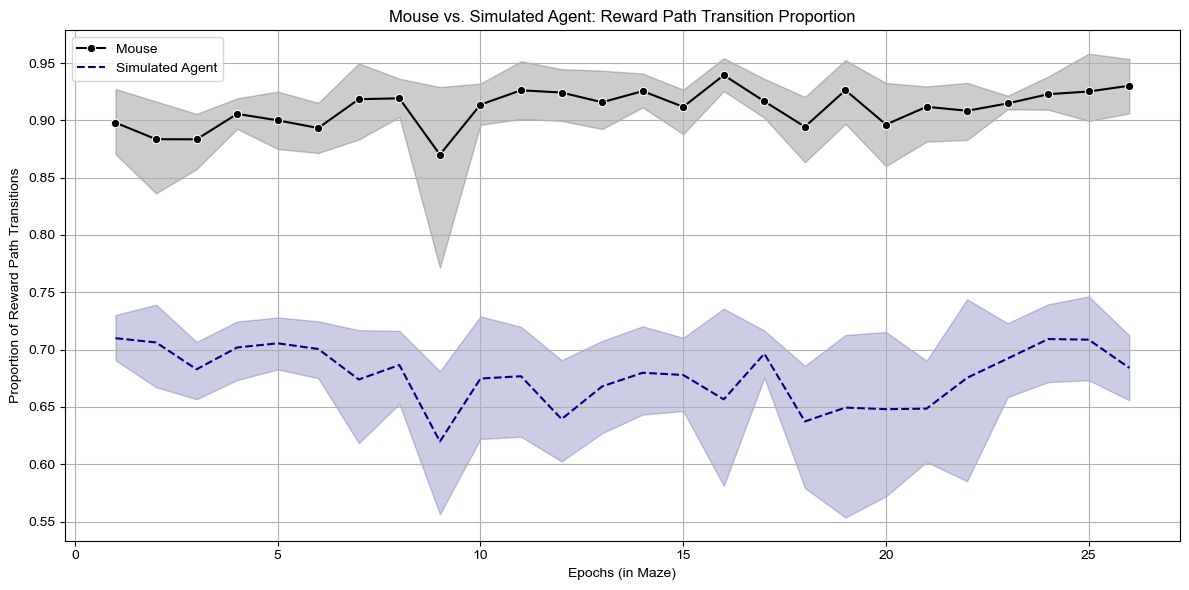

In [17]:
plot_agent_transition_performance(df_sim_trimmed)

# Save figure
save_figure(GENOTYPE+"_SimAgent_Mouse_Perf", subdir='results/simulation_agent', ext='pdf')

### EXTRA: Simulated Agent v/s Mouse Performance across Time for all Genotypes (when multiple genotypes)

In [ ]:
# # Plot for all Genotypes with their respective simulated agents
# plot_agent_transition_performance_by_genotype(df_all_csv)

# # Save figure
# save_figure("AllGenotype_SimAgent_Mouse_Perf", subdir='results/simulation_agent', ext='pdf')

## Plot 2: Relative Performance across Time

Saved: c:\Users\PalopLabPortal\Gladstone Dropbox\Shreya Bangera\Labyrinth Mazes discussions\Code\TEST_COMPASS\results/simulation_agent\WT-WT_Relative_Perf.pdf


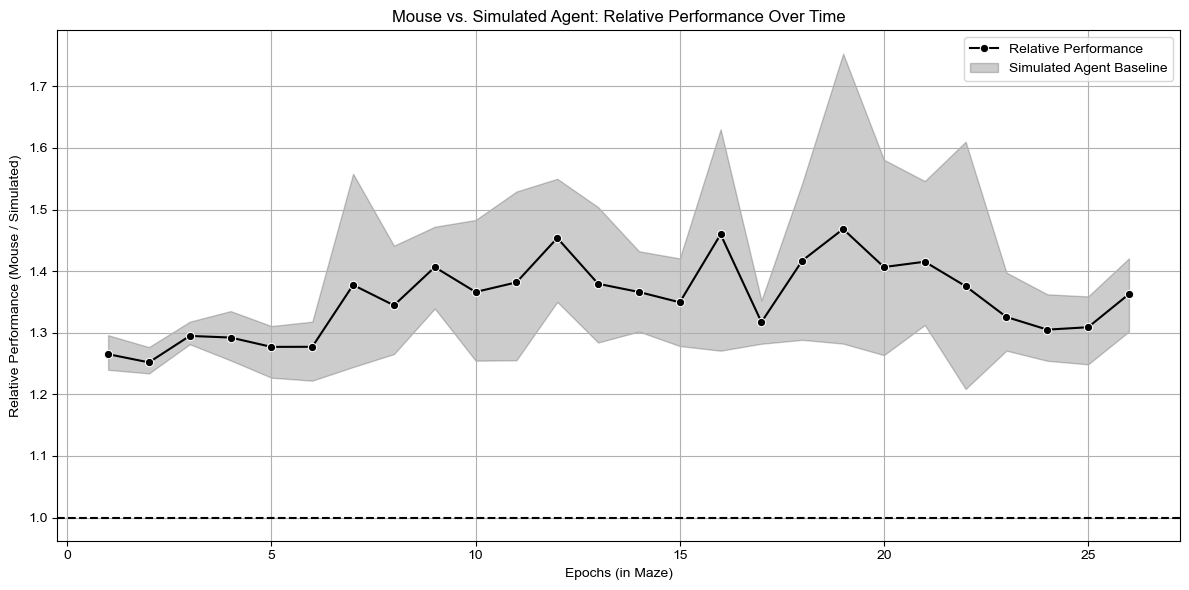

In [18]:
plot_relative_agent_performance(df_sim_trimmed)

# Save figure
save_figure(GENOTYPE+"_Relative_Perf", subdir='results/simulation_agent', ext='pdf')

### EXTRA: Relative Performance across Time for all Genotypes  (when multiple genotypes)

In [ ]:
# # Plot for all Genotypes with their respective simulated agents
# plot_relative_agent_performance_by_genotype(df_all_csv,palette=PALETTE)

# # Save figure
# save_figure("AllGenotype_Relative_Perf", subdir='results/simulation_agent', ext='pdf')

## Plot 3: Avg. Simulated Agent and Mouse Performance across Sessions(/Mice) 

 Max common epoch across all sessions: 26
Saved: c:\Users\PalopLabPortal\Gladstone Dropbox\Shreya Bangera\Labyrinth Mazes discussions\Code\TEST_COMPASS\results/simulation_agent\Cumulative_SimAgent_Mouse_Perf.pdf


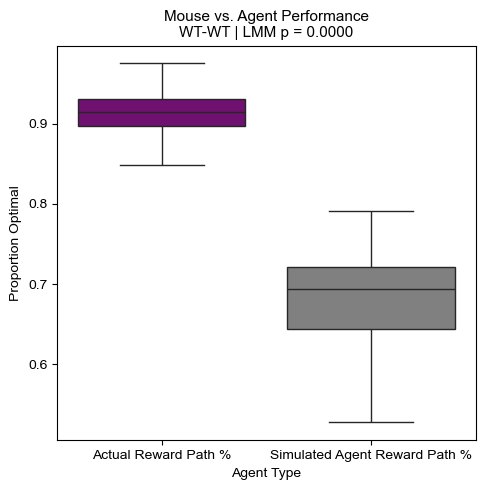

In [24]:
# Parameter values have to be same as above in the Simulated agent v/s Mouse line plot

#_______________________________________________
pvals_by_genotype = run_mixedlm_for_all_genotypes(
    df_all_csv,
    epoch_size = EPOCH_SIZE,
    n_bootstrap = N_BOOTSTRAP,
    n_simulations = N_SIMULATIONS,
    decision_label = DECISION_LABEL,
    reward_label = REWARD_LABEL,
    plot_palette=["purple", "grey"]
)

# Save figure
save_figure("Cumulative_SimAgent_Mouse_Perf", subdir='results/simulation_agent', ext='pdf')

# Chi Square Analysis

In [25]:
# =================== USAGE EXAMPLE =================== #
# This workflow calculates the chi-square divergence between actual animal performance
# and a simulated agent’s expected behavior across epochs, and summarizes the result using
# both rolling and cumulative statistics to track behavioral divergence over time.

# Recommended Use:
# ---------------
# 1. Ensure `df_sim_trimmed` contains 'Actual Reward Path %', 'Simulated Agent Reward Path %', 
#    'Epoch Number', and 'Session' columns.
# 2. Use `compute_chi_square_statistic()` to compute per-epoch chi-square scores comparing actual vs. simulated usage.
# 3. Use `compute_rolling_chi_square()` to calculate rolling averages over time for trend visualization.
# 4. Use `compute_cumulative_chi_square()` to track the running average of chi-square divergence over all prior epochs.

# Example Workflow:
# -----------------

#________________________________________________________
# Step 1: Compute per-epoch chi-square statistics
df_chisq = compute_chi_square_statistic(df_sim_trimmed)

# Step 2: Add rolling average (e.g., per 5-epoch window)
df_chisq = compute_rolling_chi_square(df_chisq,window=3)

# Step 3: Add cumulative average
df_chisq = compute_cumulative_chi_square(df_chisq)


## Plot 4: Chi Square Statistic of Agents across Time

Saved: c:\Users\PalopLabPortal\Gladstone Dropbox\Shreya Bangera\Labyrinth Mazes discussions\Code\TEST_COMPASS\results/simulation_agent\WT-WT_Chi_Square_statistic.pdf
Saved: c:\Users\PalopLabPortal\Gladstone Dropbox\Shreya Bangera\Labyrinth Mazes discussions\Code\TEST_COMPASS\results/simulation_agent\WT-WT_Average_Rolling_Chi_Square.pdf
Saved: c:\Users\PalopLabPortal\Gladstone Dropbox\Shreya Bangera\Labyrinth Mazes discussions\Code\TEST_COMPASS\results/simulation_agent\WT-WT_Cumulative_Chi_Square.pdf


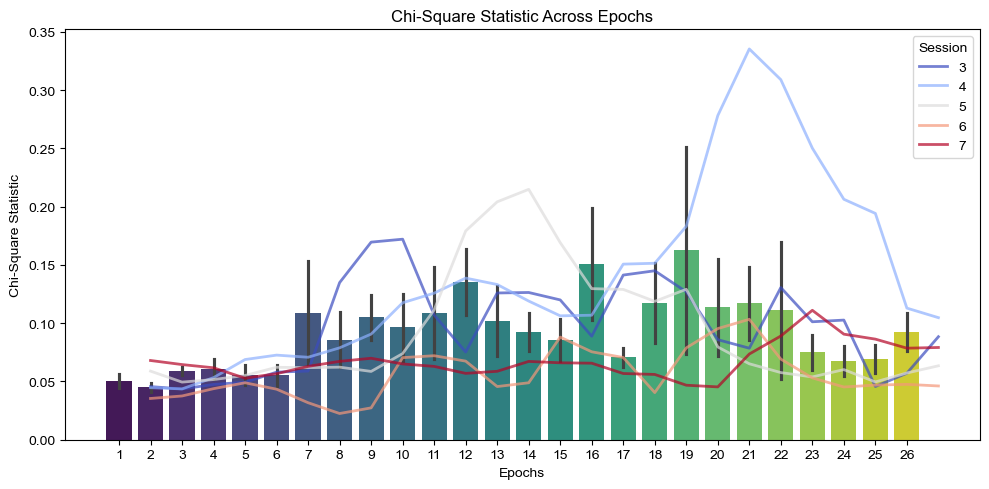

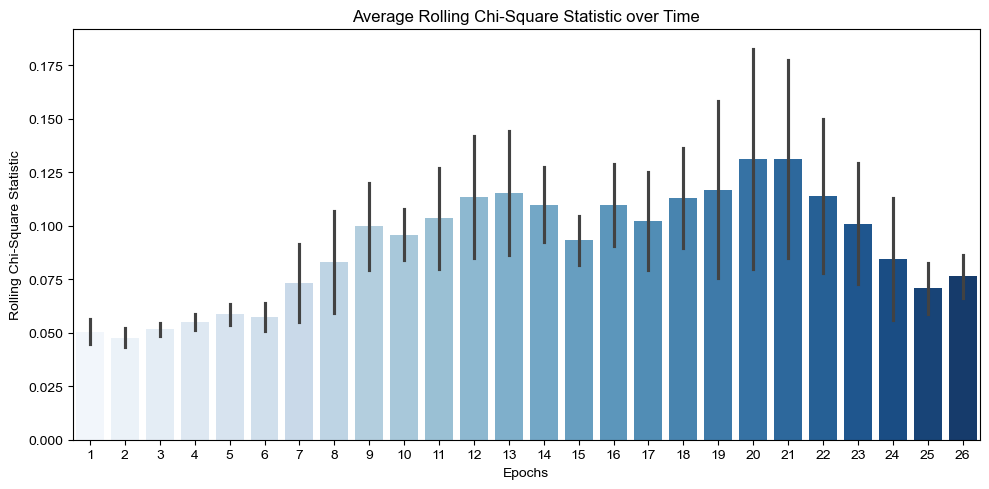

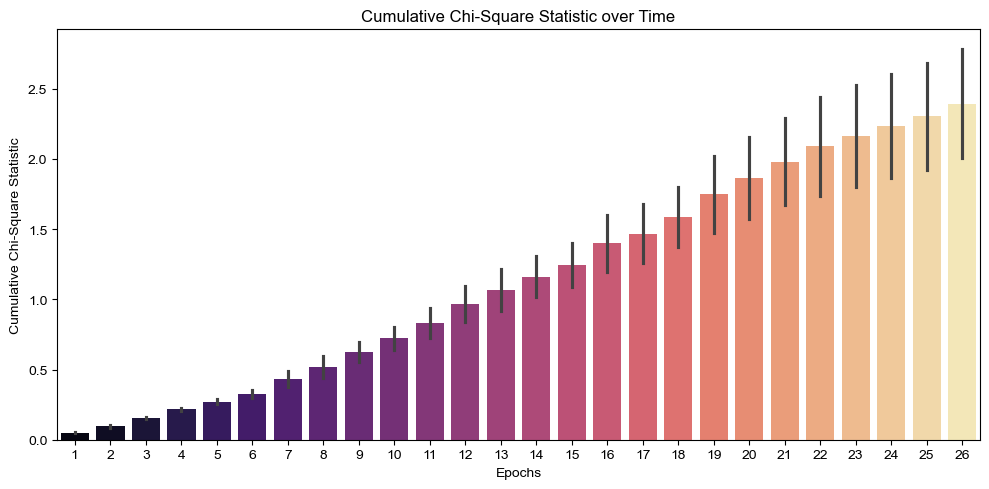

In [26]:
# Plot Chi Square
plot_chi_square_and_rolling(df_chisq)
# Save figure
save_figure(GENOTYPE+"_Chi_Square_statistic", subdir='results/simulation_agent', ext='pdf')

# Plot Rolling stats
plot_rolling_mean(df_chisq)
# Save figure
save_figure(GENOTYPE+"_Average_Rolling_Chi_Square", subdir='results/simulation_agent', ext='pdf')

# Plot Cumulative stats
plot_cumulative_chi_square(df_chisq)
# Save figure
save_figure(GENOTYPE+"_Cumulative_Chi_Square", subdir='results/simulation_agent', ext='pdf')


## EXTRA: Chi Square Statistic of Agents across Time for all genotypes (when multiple genotypes)

In [ ]:
# #--------------- SET THESE VALUES --------------#
# ROLLING_WINDOW = 3 # for the rolling mean chi-sq

# #__________________________________________________________________________
# # Step 1: Compute chi-square stats for each genotype
# df_chisq_all = run_chi_square_analysis_by_genotype(
#     df_all_csv,
#     epoch_size=EPOCH_SIZE,
#     n_bootstrap=N_BOOTSTRAP,
#     n_simulations=N_SIMULATIONS,
#     decision_label=DECISION_LABEL,
#     reward_label=REWARD_LABEL,
#     rolling_window=ROLLING_WINDOW
# )

# # Step 2: Subplot-based visualizations
# plot_chi_square_and_rolling_subplots(df_chisq_all)
# save_figure("AllGenotype_Chi_Square_statistic", subdir='results/simulation_agent', ext='pdf')

# plot_rolling_mean_subplots(df_chisq_all)
# save_figure("AllGenotype_Average_Rolling_Chi_Square", subdir='results/simulation_agent', ext='pdf')

# plot_cumulative_chi_square_subplots(df_chisq_all)
# save_figure("AllGenotype_Cumulative_Chi_Square", subdir='results/simulation_agent', ext='pdf')


# Simulated Agent, Binary Agent, 3/4-way Agent Modelling & Comparison

In [ ]:
# =================== USAGE EXAMPLE =================== #
# This function simulates multiple agent types (simulated, binary, and 3/4-way),
# evaluates their decision performance over fixed-size epochs, and compares
# them to actual animal decisions using bootstrap confidence intervals.

# Recommended Use:
# ---------------
# 1. Ensure `df_all_csv` includes 'Session', 'NodeType', 'Region', and 'Grid Number'.
# 2. Use `epoch_size` to define the time resolution (e.g., 1000 frames per epoch).
# 3. Set `n_simulations` and `n_bootstrap` to define agent variability and confidence bounds.
# 4. Use `decision_label` and `reward_label` to define relevant transitions (e.g., 'Decision (Reward)', 'Reward Path').
# 5. Optional: Pass custom 3-way and 4-way decision node sets.

# Example Workflow:
# -----------------

#--------------- SET THESE VALUES --------------#
EPOCH_SIZE = 1000
N_SIMULATIONS = 100
N_BOOTSTRAP = 10000
DECISION_LABEL = 'Decision (Reward)'
REWARD_LABEL = 'Reward Path'

#________________________________________________________________________________________
# Evaluate agent vs. actual decisions
df_all_simulated = evaluate_agent_performance_multi(
    df_all_csv,
    epoch_size=EPOCH_SIZE,
    n_bootstrap=N_BOOTSTRAP,
    n_simulations=N_SIMULATIONS,
    decision_label=DECISION_LABEL,
    reward_label=REWARD_LABEL
)

# Best to use trimmed dataframe after cutting to max. common epoch number scross Sessions
df_all_simulated_trim = trim_to_common_epochs(df_all_simulated)


 Max common epoch across all sessions: 26


## Plot 5: All Agents Comparative Performance over time

Saved: c:\Users\PalopLabPortal\Gladstone Dropbox\Shreya Bangera\Labyrinth Mazes discussions\Code\TEST_COMPASS\results/simulation_agent\WT-WT_Multiple_agent.pdf


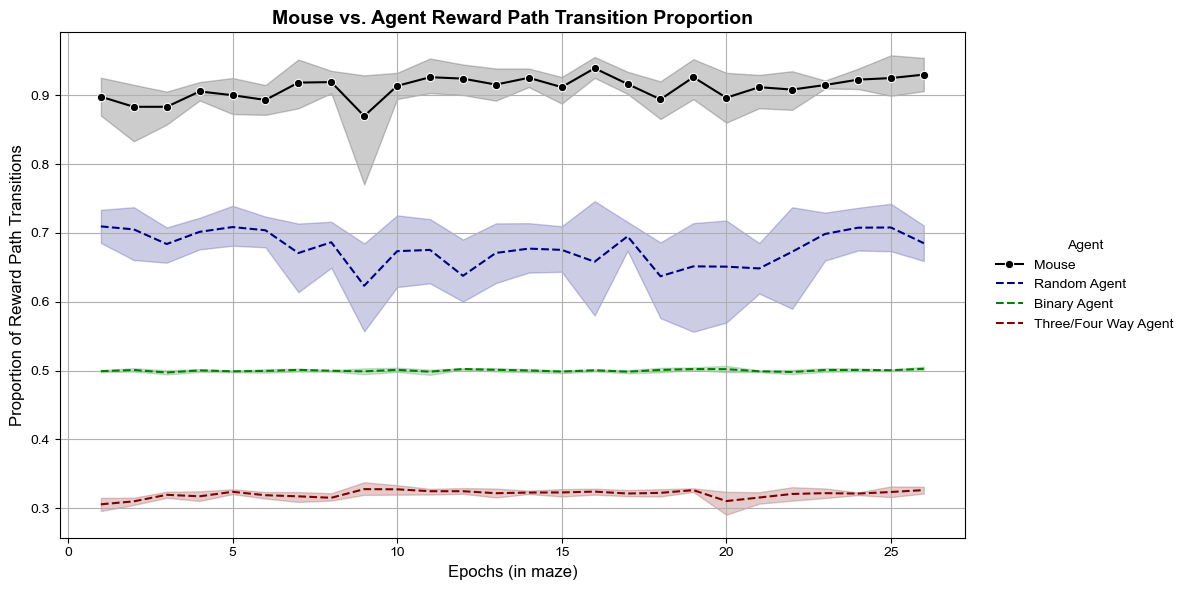

In [30]:
#--------------- SET THIS VALUE --------------#
GENOTYPE = 'WT-WT'

#________________________________________________________
plot_agent_vs_mouse_performance_multi(
    df_metrics=df_all_simulated_trim,
    mouseinfo=mouseinfo,
    genotype=GENOTYPE
)


# Save figure
save_figure(GENOTYPE+"_Multiple_agent", subdir='results/simulation_agent', ext='pdf')

## Plot 6: Cumulative Multiple Agent Performance

Saved: c:\Users\PalopLabPortal\Gladstone Dropbox\Shreya Bangera\Labyrinth Mazes discussions\Code\TEST_COMPASS\results/simulation_agent\WT-WT_Cumulative_Multiple_agent.pdf


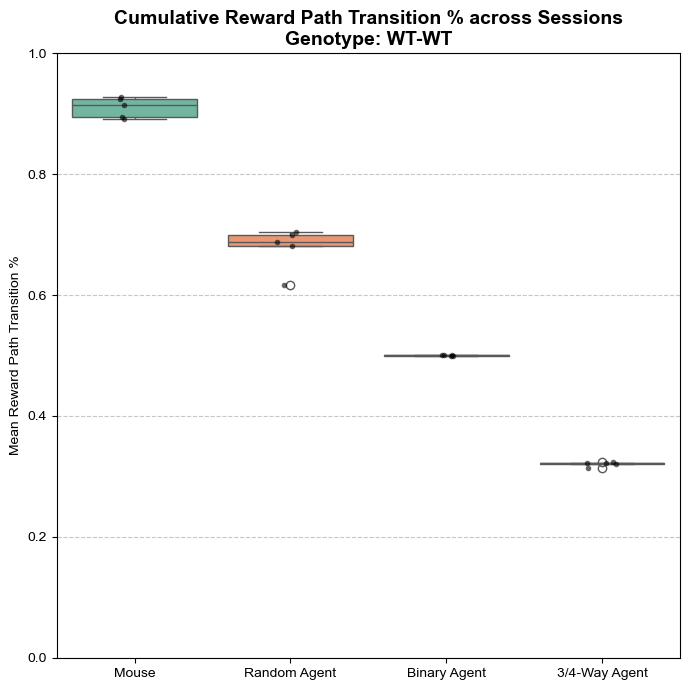

In [31]:
# =================== USAGE EXAMPLE =================== #
# This function compares average reward path transition percentages across sessions
# for mouse and simulated agents using a boxplot. Useful for visualizing group-wise strategy efficiency.

# Recommended Use:
# ---------------
# 1. Provide `df_metrics` from evaluate_agent_performance_multi().
# 2. Provide `mouseinfo` with 'Session #' and 'Genotype'.
# 3. Set `genotype` to the group you want to compare.

# Example Workflow:
# -----------------

#--------------- SET THIS VALUE --------------#
GENOTYPE = 'WT-WT'

#______________________________________________________
plot_cumulative_agent_comparison_boxplot_multi(
    df_metrics=df_all_simulated_trim,
    mouseinfo=mouseinfo,
    genotype=GENOTYPE,
    figsize=(7, 7)
)

# Save figure
save_figure(GENOTYPE+"_Cumulative_Multiple_agent", subdir='results/simulation_agent', ext='pdf')

# Exploration-Exploitation (EE) Agent Evaluation

In [32]:
# =================== USAGE EXAMPLE =================== #
# This module simulates an exploration-exploitation agent with a tunable 
# exploration rate and compares its reward path transition performance to 
# that of real mice over fixed-size epochs.

# Recommended Use:
# ----------------
# 1. Ensure `df_all_csv` includes 'Session', 'NodeType', 'Region', and 'Grid.Number' columns.
# 2. Set `exploration_rate` to define the agent’s behavior:
#       - Low values (e.g., 0.2) bias toward exploitation (optimal paths).
#       - High values (e.g., 0.9) bias toward exploration (random paths).
# 3. Use `segment_size` consistently in both analysis and plotting functions.
# 4. Use `n_simulations` and `n_bootstrap` to determine statistical confidence.
# 5. Use `decision_label` and `reward_label` to define what constitutes a decision and a reward-oriented move.

# Example Workflow:
# -----------------
SEGMENT_SIZE = 1000  # Ensure this is consistent across functions
EXPLORATION_RATE = 0.5  # Tunable parameter for agent behavior
EXPLORATION_RATE_RANGE = np.arange(0.2, 1.0, 0.1)  # Range of exploration rate values

# Generate DataFrame with exploration agent metrics
df_agent_perf = run_exploration_agent_analysis_EE(
    df=df_all_csv,
    exploration_rate=EXPLORATION_RATE,
    segment_size=SEGMENT_SIZE,
    n_bootstrap=10000,
    n_simulations=100,
    decision_label='Decision (Reward)',
    reward_label='Reward Path'
)

# Best to use trimmed dataframe after cutting to max. common epoch number scross Sessions
df_agent_perf_trimmed = trim_to_common_epochs(df_agent_perf)


 Max common epoch across all sessions: 26


## Plot 7: Agent Performance Across Varying Exploration Rates

Exploration rate =  0.2  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.3  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.4  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.5  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.6  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.7  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.8  being processed....
 Max common epoch across all sessions: 26
Exploration rate =  0.9  being processed....
 Max common epoch across all sessions: 26
 Max common epoch across all sessions: 26
Saved: c:\Users\PalopLabPortal\Gladstone Dropbox\Shreya Bangera\Labyrinth Mazes discussions\Code\TEST_COMPASS\results/simulation_agent\WT-WT_EE_agent.pdf


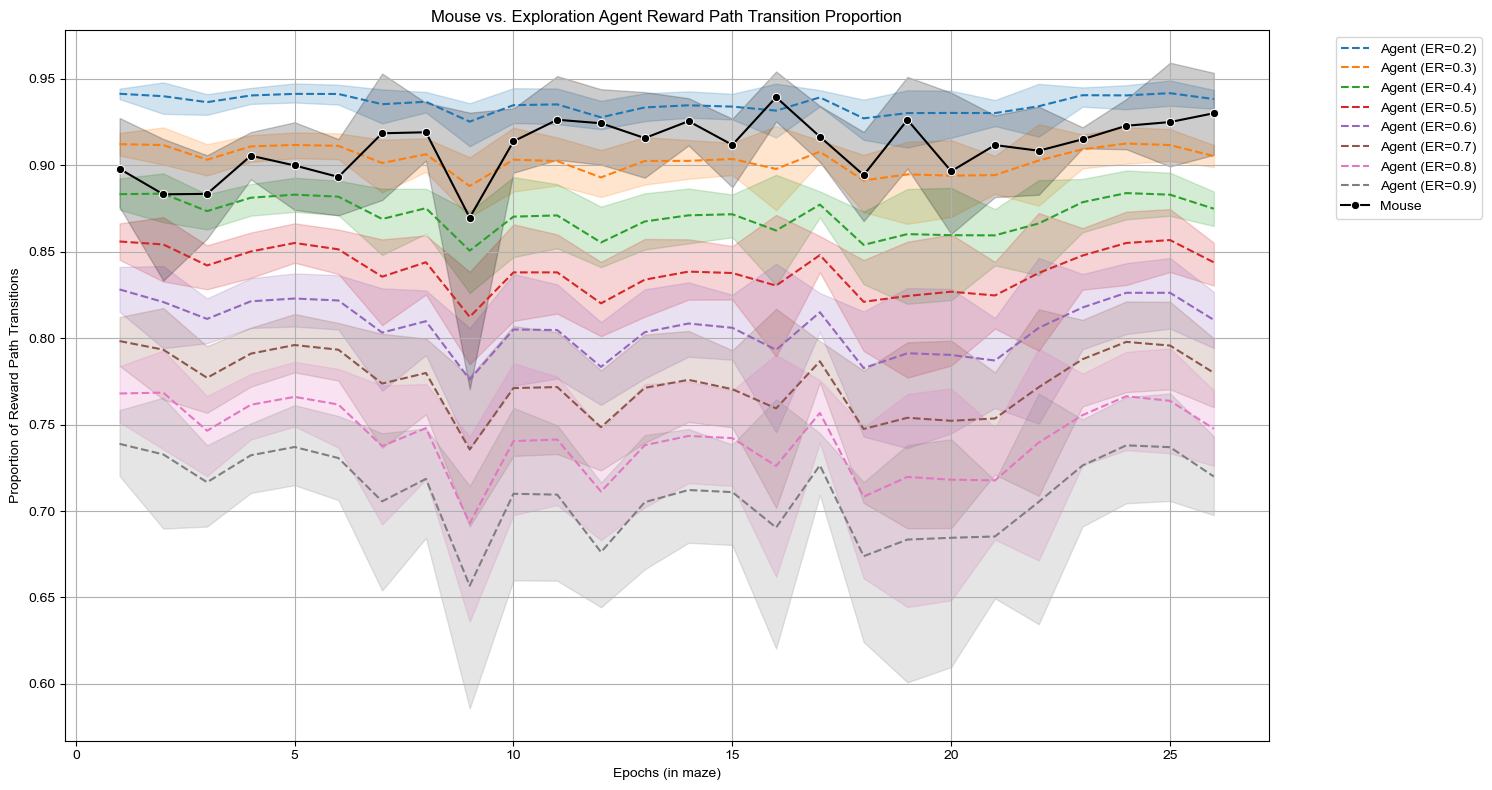

In [33]:
# Visualize agent vs. mouse performance across exploration rates
plot_exploration_rate_performance_EE(
    df_source=df_all_csv,
    exploration_rates=EXPLORATION_RATE_RANGE,
    segment_size=SEGMENT_SIZE,
    trim_dataframe=True
)

# Save figure
save_figure(GENOTYPE+"_EE_agent", subdir='results/simulation_agent', ext='pdf')

# (Optional) Convert to HTML report

In [62]:
# Convert to HTML report and save as a pdf if needed after

#! pip install nbconvert
! jupyter nbconvert "02_simulated_agent_modelling.ipynb" \
  --to html \
  --TemplateExporter.exclude_input=True \
  --output "02_simulated_agent_modelling.html"


[NbConvertApp] Converting notebook 02_simulated_agent_modelling.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 1791203 bytes to 02_simulated_agent_modelling.html
